# Scaling

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step2- Import the Data

In [2]:
baseball_players = pd.read_csv('baseball_players.csv')

In [3]:
baseball_players.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## Step 3- Analyse the data

In [4]:
baseball_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


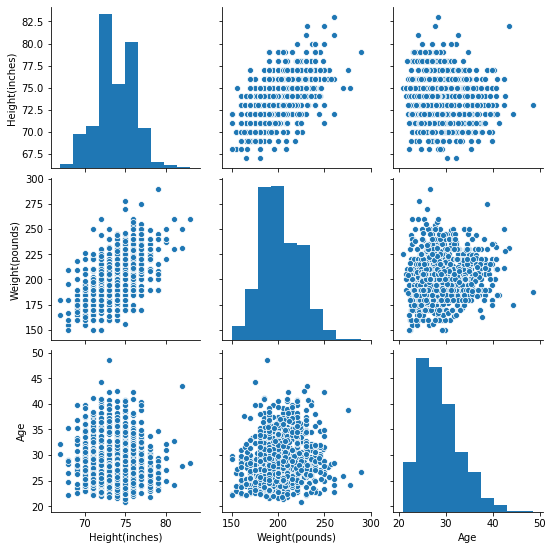

In [5]:
sns.pairplot(baseball_players)

In [6]:
baseball_players.describe().round(2)

,Height(inches),Weight(pounds),Age
count,1034.00,1033.00,1034.00
mean,73.70,201.69,28.74
std,2.31,20.99,4.32
min,67.00,150.00,20.90
25%,72.00,187.00,25.44
50%,74.00,200.00,27.92
75%,75.00,215.00,31.23
max,83.00,290.00,48.52


In [7]:
baseball_players.dropna(inplace=True)

In [8]:
baseball_players.describe().round(2)

,Height(inches),Weight(pounds),Age
count,1033.00,1033.00,1033.00
mean,73.70,201.69,28.74
std,2.31,20.99,4.32
min,67.00,150.00,20.90
25%,72.00,187.00,25.44
50%,74.00,200.00,27.93
75%,75.00,215.00,31.24
max,83.00,290.00,48.52


## Step 4- Test/Train split

In [9]:
X = baseball_players[['Height(inches)','Weight(pounds)','Age']]
y = baseball_players['Position']

In [11]:
y

0              Catcher
1              Catcher
2              Catcher
3        First_Baseman
4        First_Baseman
             ...      
1029    Relief_Pitcher
1030    Relief_Pitcher
1031    Relief_Pitcher
1032    Relief_Pitcher
1033    Relief_Pitcher
Name: Position, Length: 1033, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
column_list = X.columns
print(column_list)

Index(['Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')


## Step 5- Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(data=X_train_norm,columns=column_list)
X_test_scaled = pd.DataFrame(data=X_test_norm,columns=column_list)

In [18]:
X_train_scaled.describe().round(2)

,Height(inches),Weight(pounds),Age
count,619.00,619.00,619.00
mean,0.45,0.37,0.33
std,0.16,0.15,0.18
min,0.00,0.00,0.00
25%,0.33,0.25,0.19
50%,0.47,0.36,0.28
75%,0.53,0.46,0.44
max,1.00,1.00,1.00


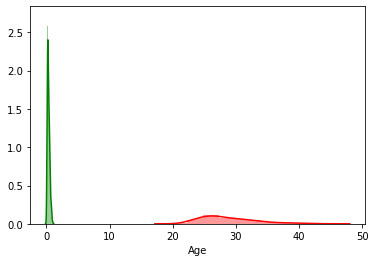

In [19]:
sns.distplot(X_train_scaled['Age'],color='green')
sns.distplot(X_train['Age'],color='red')

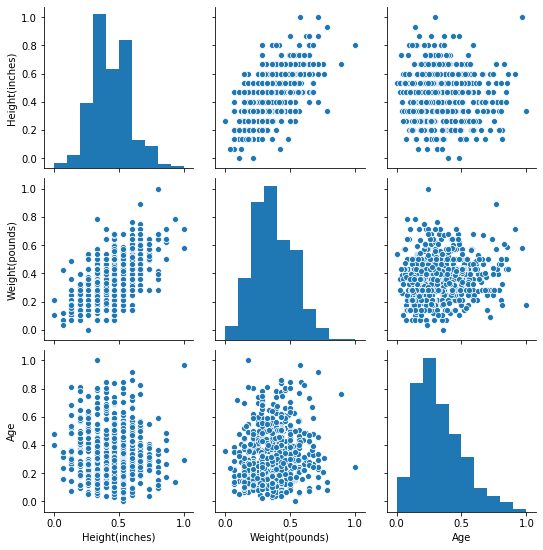

In [20]:
sns.pairplot(X_train_scaled)

## Step 6- Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(data=X_train_norm,columns=column_list)
X_test_scaled = pd.DataFrame(data=X_test_norm,columns=column_list)

In [24]:
X_train_scaled.describe().round(2)

,Height(inches),Weight(pounds),Age
count,619.00,619.00,619.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.83,-2.44,-1.81
25%,-0.73,-0.76,-0.77
50%,0.11,-0.07,-0.25
75%,0.53,0.64,0.60
max,3.47,4.20,3.68


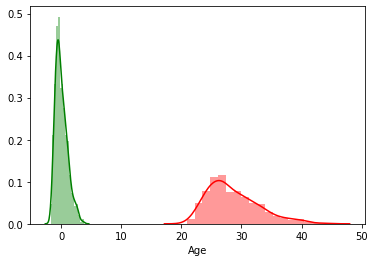

In [25]:
sns.distplot(X_train_scaled['Age'],color='green')
sns.distplot(X_train['Age'],color='red')

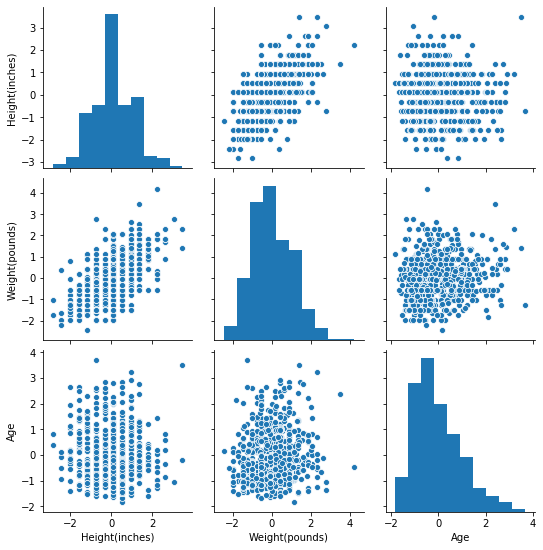

In [26]:
sns.pairplot(X_train_scaled)